# Personal Medical Cost Prediction

This project has the objective to demonstrate the use of different models of machine learning to predict personal Medical Cost

The dataset used in this project was the ["Medical Cost Personal Datasets"](https://www.kaggle.com/mirichoi0218/insurance)

# Libraries

In [1]:
import pandas as pd
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Data

In [2]:
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Analysis

### Data description

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Age

<center><img src='https://www.researchgate.net/profile/Wen_Bing_Horng/publication/228404297/figure/tbl1/AS:646486622740481@1531145830144/Age-intervals-and-age-groups.png'></center>

In [4]:
young_adult = data[(data['age'] >= 18) & (data['age'] <= 39)]

middle_aged_adults = data[(data['age'] >= 40) & (data['age'] <= 59)]

old_adults = data[data['age'] >= 60]

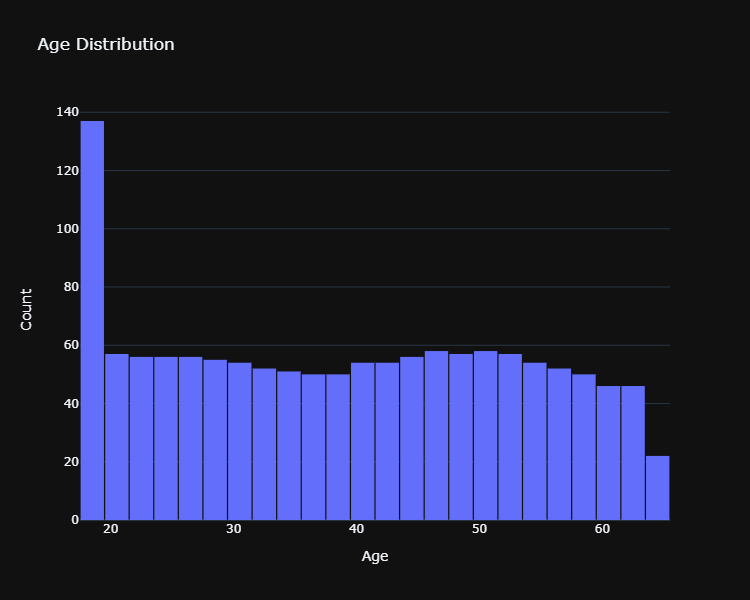

In [5]:
fig_age = go.Figure()

fig_age.add_trace(go.Histogram(x = data['age']))

fig_age.update_layout(
    title_text = 'Age Distribution',
    xaxis_title_text = 'Age',
    yaxis_title_text = 'Count',
    bargap = 0.05,
    template = 'plotly_dark'
)

fig_age.show('png', width = 750, height = 600)

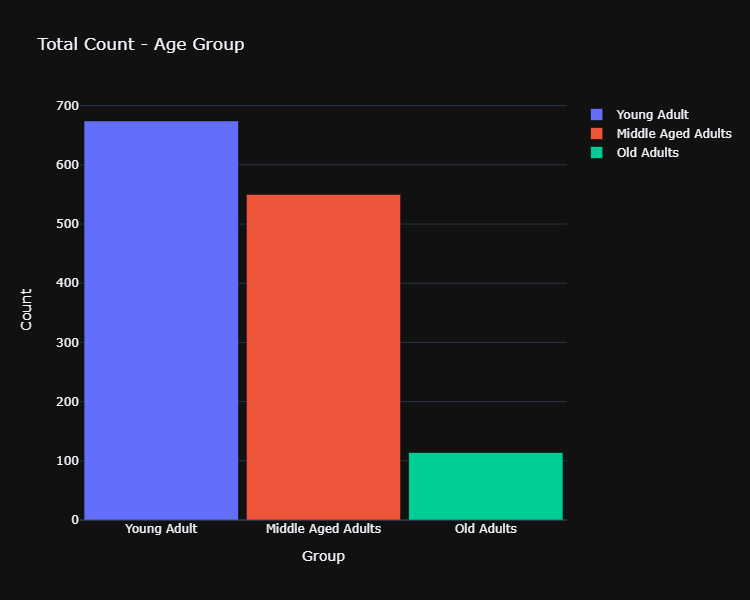

In [6]:
fig_age = go.Figure()

fig_age.add_trace(go.Bar(x = ['Young Adult'],
                         y = [len(young_adult)],
                         name = 'Young Adult'))

fig_age.add_trace(go.Bar(x = ['Middle Aged Adults'],
                         y = [len(middle_aged_adults)],
                         name = 'Middle Aged Adults'))

fig_age.add_trace(go.Bar(x = ['Old Adults'],
                         y = [len(old_adults)],
                         name = 'Old Adults'))

fig_age.update_layout(
    title_text = 'Total Count - Age Group',
    xaxis_title_text = 'Group',
    yaxis_title_text = 'Count',
    bargap = 0.05,
    template = 'plotly_dark'
)

fig_age.show('png', width = 750, height = 600)

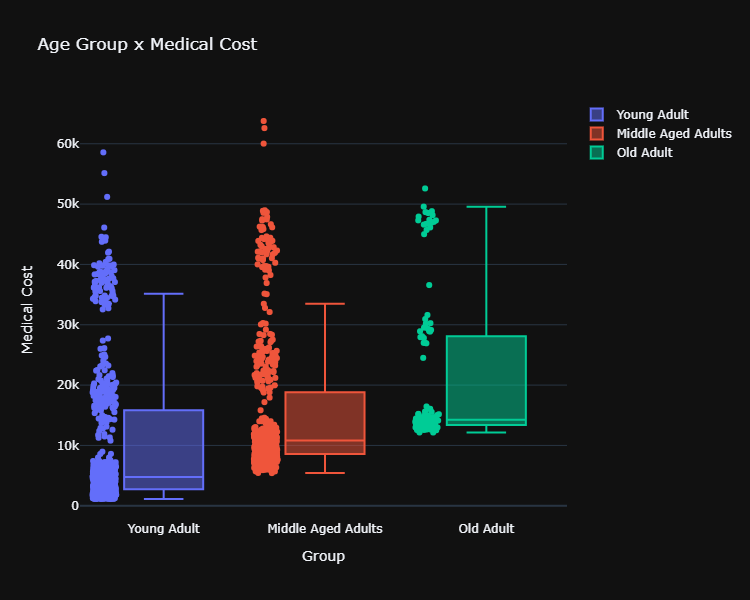

In [7]:
fig_age = go.Figure()

fig_age.add_trace(go.Box(y = young_adult['charges'], 
                         boxpoints = 'all', 
                         name = 'Young Adult'))

fig_age.add_trace(go.Box(y = middle_aged_adults['charges'], 
                         boxpoints = 'all', 
                         name = 'Middle Aged Adults'))

fig_age.add_trace(go.Box(y = old_adults['charges'], 
                         boxpoints='all', 
                         name = 'Old Adult'))

fig_age.update_layout(
    title_text = 'Age Group x Medical Cost',
    xaxis_title_text = 'Group',
    yaxis_title_text = 'Medical Cost',
    template = 'plotly_dark'
)

fig_age.show('png', width = 750, height = 600)

### Sex

In [8]:
male = data[data['sex'] == 'male']

female = data[data['sex'] == 'female']

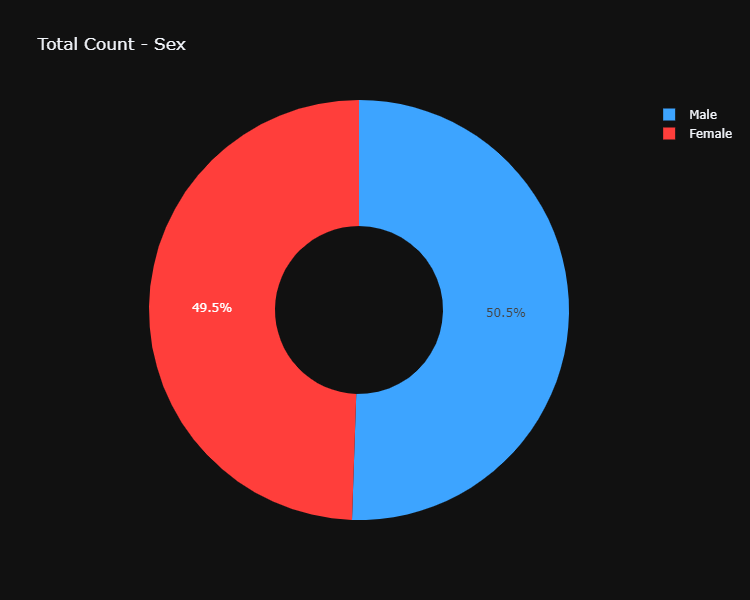

In [9]:
colors= ['#3da4ff', '#ff3e3b']

labels = ['Male', 'Female']

values = [len(male), 
          len(female)]

fig_sex = go.Figure()

fig_sex.add_trace(go.Pie(labels = labels, 
                         values = values,
                         hole = .4,
                         marker_colors = colors))

fig_sex.update_layout(
    title_text = 'Total Count - Sex',
    template = 'plotly_dark'
)

fig_sex.show('png', width = 750, height = 600)

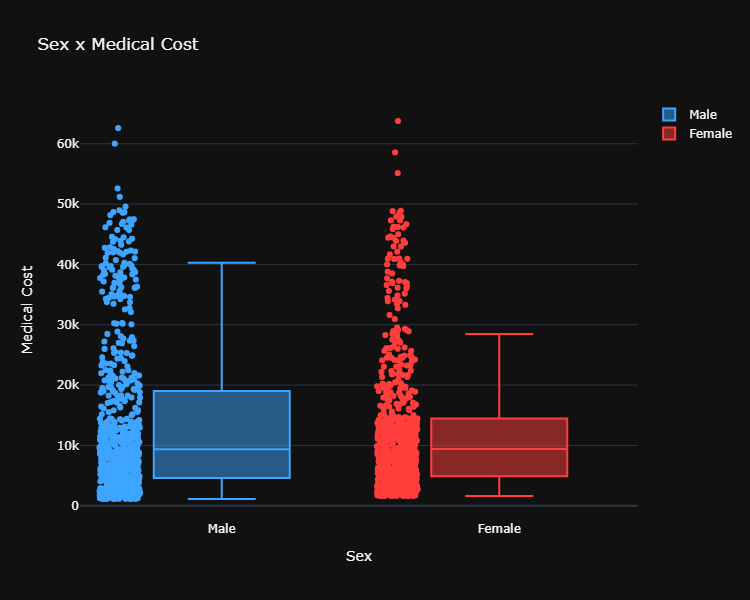

In [10]:
fig_sex = go.Figure()

fig_sex.add_trace(go.Box(y=male['charges'], 
                         boxpoints='all', 
                         marker_color = '#3da4ff', 
                         name='Male'))

fig_sex.add_trace(go.Box(y=female['charges'],
                         boxpoints='all', 
                         marker_color = '#ff3e3b', 
                         name='Female'))

fig_sex.update_layout(
    title_text = 'Sex x Medical Cost',
    xaxis_title_text = 'Sex',
    yaxis_title='Medical Cost',
    template = 'plotly_dark'
)

fig_sex.show('png', width = 750, height = 600)

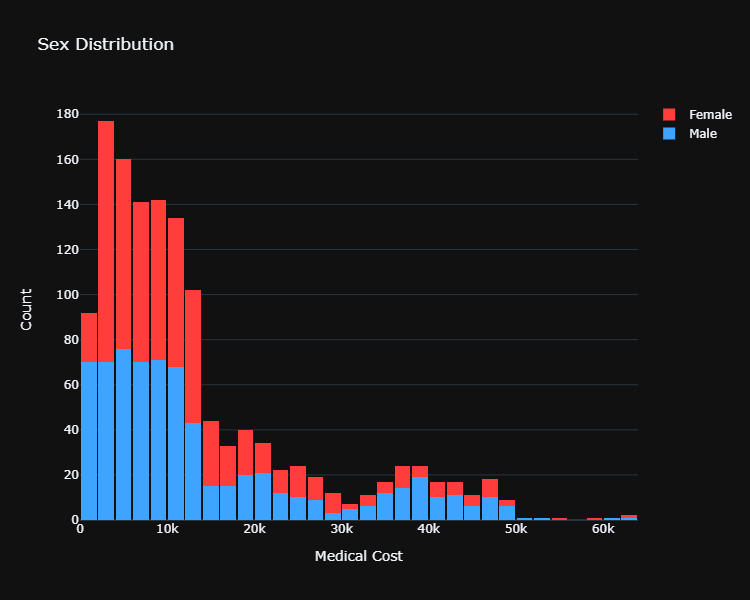

In [11]:
fig_sex = go.Figure()

fig_sex.add_trace(go.Histogram(x = male['charges'],
                               name = 'Male', 
                               marker_color = '#3da4ff'))

fig_sex.add_trace(go.Histogram(x = female['charges'],
                               name = 'Female', 
                               marker_color = '#ff3e3b'))

fig_sex.update_layout(
    barmode='stack',
    title_text = 'Sex Distribution',
    xaxis_title_text = 'Medical Cost',
    yaxis_title='Count',
    template = 'plotly_dark',
    bargap = 0.1
)

fig_sex.show('png', width = 750, height = 600)

### BMI

<center><img src='https://biotechpossibilities.com/wp-content/uploads/2015/11/Bio_BMI-chart_blog.jpg'></center>

In [12]:
underweight = data[data['bmi'] <= 18.5]

normal = data[(data['bmi'] > 18.5) & (data['bmi'] <= 24.9)]

overweight = data[(data['bmi'] >= 25) & (data['bmi'] <= 29.9)]

obese = data[data['bmi'] >= 30]

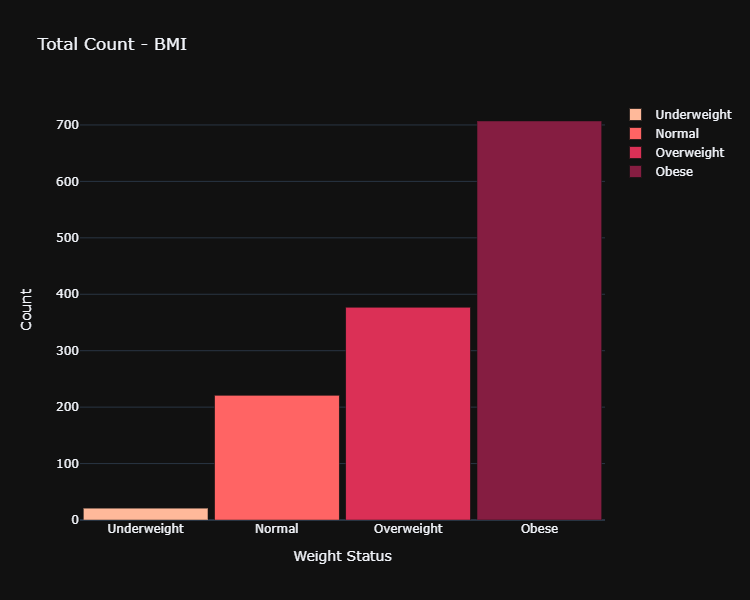

In [13]:
fig_bmi = go.Figure()

fig_bmi.add_trace(go.Bar(x = ['Underweight'],
                         y = [len(underweight)],
                         name = 'Underweight',
                         marker_color = '#ffb99a'))

fig_bmi.add_trace(go.Bar(x = ['Normal'],
                         y = [len(normal)],
                         name = 'Normal',
                         marker_color = '#ff6464'))

fig_bmi.add_trace(go.Bar(x = ['Overweight'],
                         y = [len(overweight)],
                         name = 'Overweight',
                         marker_color = '#db3056'))

fig_bmi.add_trace(go.Bar(x = ['Obese'],
                         y = [len(obese)],
                         name = 'Obese',
                         marker_color = '#851d41'))


fig_bmi.update_layout(
    title_text = 'Total Count - BMI ',
    xaxis_title_text = 'Weight Status',
    yaxis_title_text = 'Count',
    bargap = 0.05,
    template = 'plotly_dark'
)

fig_bmi.show('png', width = 750, height = 600)

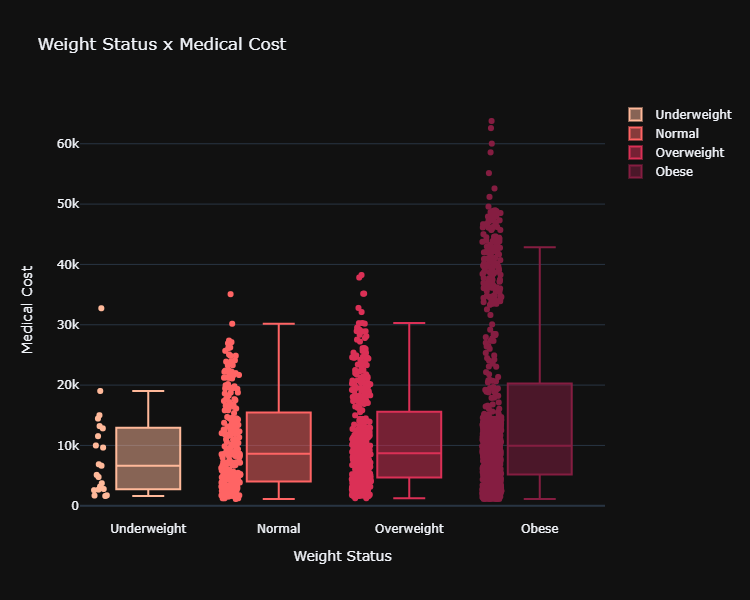

In [14]:
fig_bmi = go.Figure()

fig_bmi.add_trace(go.Box(y = underweight['charges'], 
                         boxpoints = 'all', 
                         marker_color = '#ffb99a',
                         name = 'Underweight'))

fig_bmi.add_trace(go.Box(y = normal['charges'], 
                         boxpoints = 'all', 
                         marker_color = '#ff6464', 
                         name = 'Normal'))

fig_bmi.add_trace(go.Box(y = overweight['charges'], 
                         boxpoints = 'all', 
                         marker_color = '#db3056', 
                         name = 'Overweight'))

fig_bmi.add_trace(go.Box(y = obese['charges'], 
                         boxpoints = 'all', 
                         marker_color = '#851d41', 
                         name = 'Obese'))

fig_bmi.update_layout(
    title_text = 'Weight Status x Medical Cost',
    xaxis_title_text = 'Weight Status',
    yaxis_title_text = 'Medical Cost',
    template = 'plotly_dark'
)

fig_bmi.show('png', width = 750, height = 600)

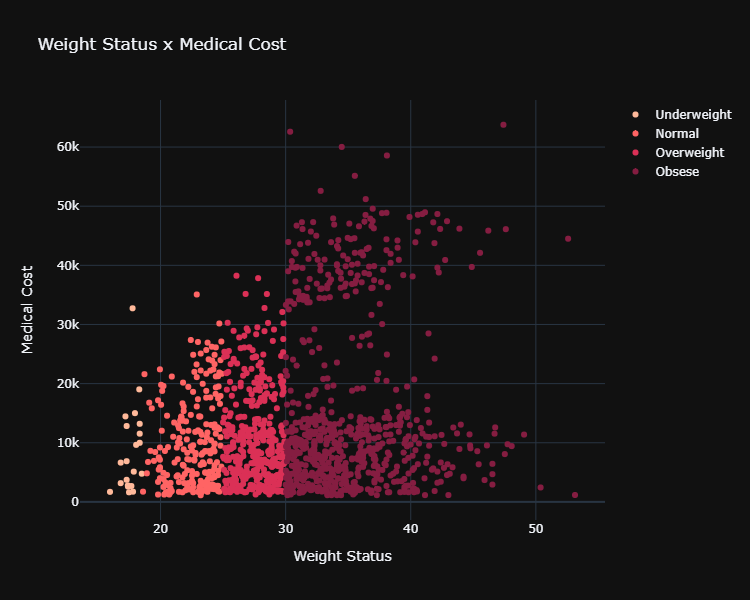

In [15]:
fig_bmi = go.Figure()

fig_bmi.add_trace(go.Scatter(x = underweight['bmi'],
                             y = underweight['charges'],
                             marker_color = '#ffb99a',
                             mode = 'markers',
                             name = 'Underweight'))

fig_bmi.add_trace(go.Scatter(x = normal['bmi'],
                             y = normal['charges'],
                             marker_color = '#ff6464',
                             mode = 'markers',
                             name = 'Normal'))

fig_bmi.add_trace(go.Scatter(x = overweight['bmi'],
                             y = overweight['charges'],
                             marker_color = '#db3056', 
                             mode = 'markers',
                             name = 'Overweight'))

fig_bmi.add_trace(go.Scatter(x = obese['bmi'],
                             y = obese['charges'],
                             marker_color = '#851d41', 
                             mode = 'markers',
                             name = 'Obsese'))

fig_bmi.update_layout(
    title_text = 'Weight Status x Medical Cost',
    xaxis_title_text = 'Weight Status',
    yaxis_title_text = 'Medical Cost', 
    template = 'plotly_dark'
)

fig_bmi.show('png', width = 750, height = 600)

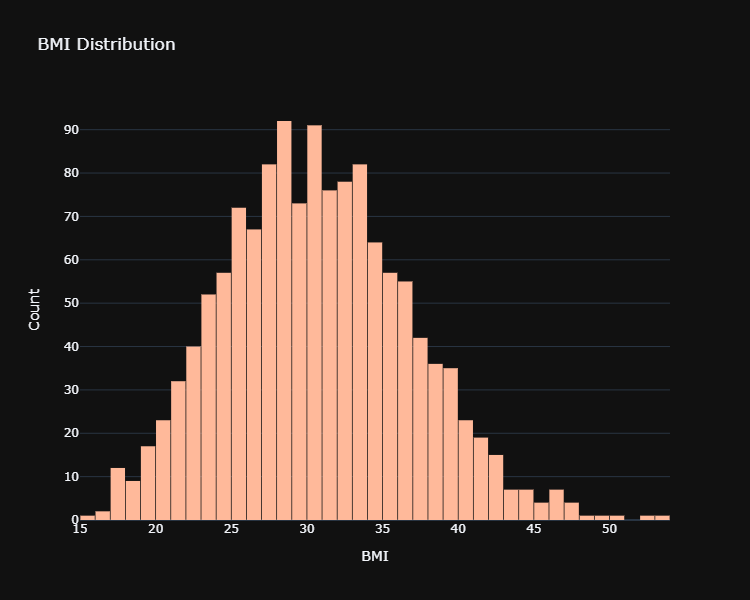

In [16]:
fig_bmi = go.Figure()

fig_bmi.add_trace(go.Histogram(x = data['bmi'],
                               marker_color = '#ffb99a'))

fig_bmi.update_layout(
    title_text = 'BMI Distribution',
    xaxis_title_text = 'BMI',
    yaxis_title_text = 'Count', 
    bargap = 0.05, 
    template = 'plotly_dark'
)

fig_bmi.show('png', width = 750, height = 600)

### Children

In [17]:
no_children = data[data['children'] == 0]

one_children = data[data['children'] == 1]

two_children = data[data['children'] == 2]

more_children = data[data['children'] == 3]

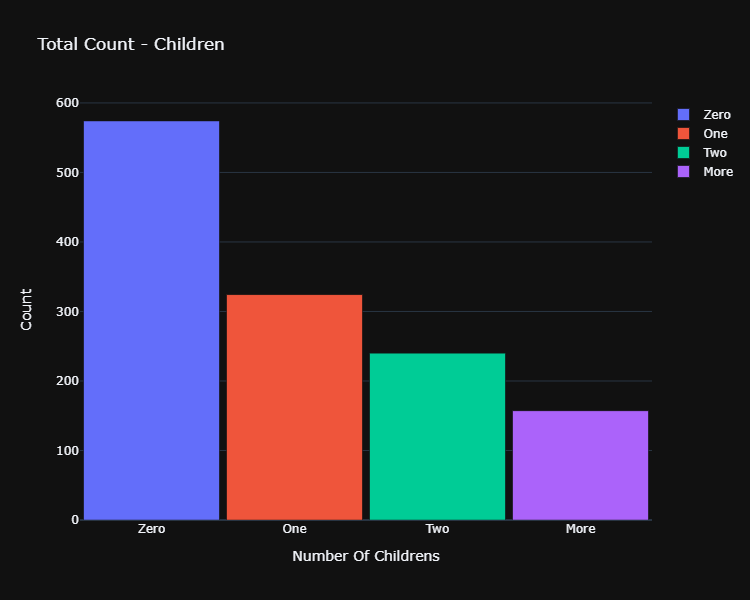

In [18]:
fig_children = go.Figure()

fig_children.add_trace(go.Bar(x = ['Zero'],
                         y = [len(no_children)],
                         name = 'Zero'))

fig_children.add_trace(go.Bar(x = ['One'],
                         y = [len(one_children)],
                         name = 'One'))

fig_children.add_trace(go.Bar(x = ['Two'],
                         y = [len(two_children)],
                         name = 'Two'))

fig_children.add_trace(go.Bar(x = ['More'],
                         y = [len(more_children)],
                         name = 'More'))


fig_children.update_layout(
    title_text = 'Total Count - Children',
    xaxis_title_text = 'Number Of Childrens',
    yaxis_title_text = 'Count',
    bargap = 0.05,
    template = 'plotly_dark'
)

fig_children.show('png', width = 750, height = 600)

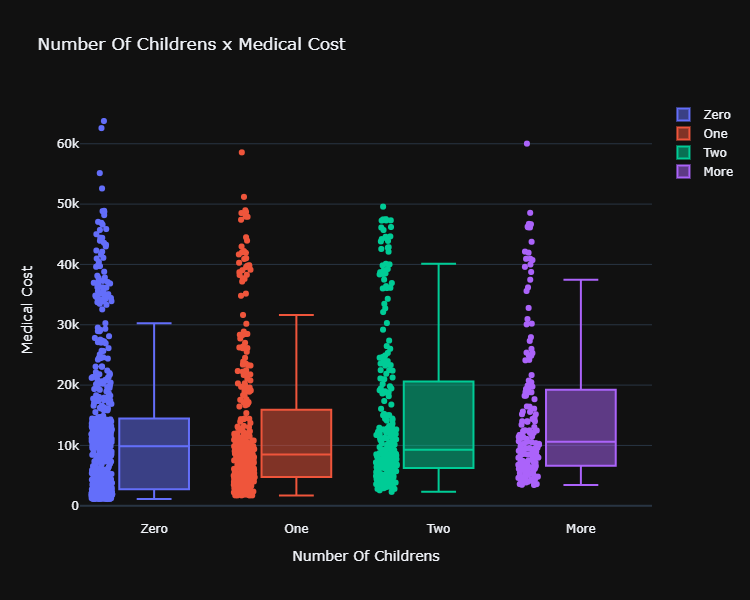

In [19]:
fig_children = go.Figure()

fig_children.add_trace(go.Box(y = no_children['charges'], 
                              boxpoints = 'all', 
                              name = 'Zero'))

fig_children.add_trace(go.Box(y = one_children['charges'], 
                              boxpoints = 'all', 
                              name = 'One'))

fig_children.add_trace(go.Box(y = two_children['charges'], 
                              boxpoints = 'all', 
                              name = 'Two'))

fig_children.add_trace(go.Box(y = more_children['charges'], 
                              boxpoints = 'all', 
                              name = 'More'))

fig_children.update_layout(
    title_text = 'Number Of Childrens x Medical Cost',
    xaxis_title_text = 'Number Of Childrens',
    yaxis_title_text = 'Medical Cost',
    template = 'plotly_dark'
)

fig_children.show('png', width = 750, height = 600)

### Smoker

In [20]:
smoker = data[data['smoker'] == 'yes']

no_smoker = data[data['smoker'] == 'no']

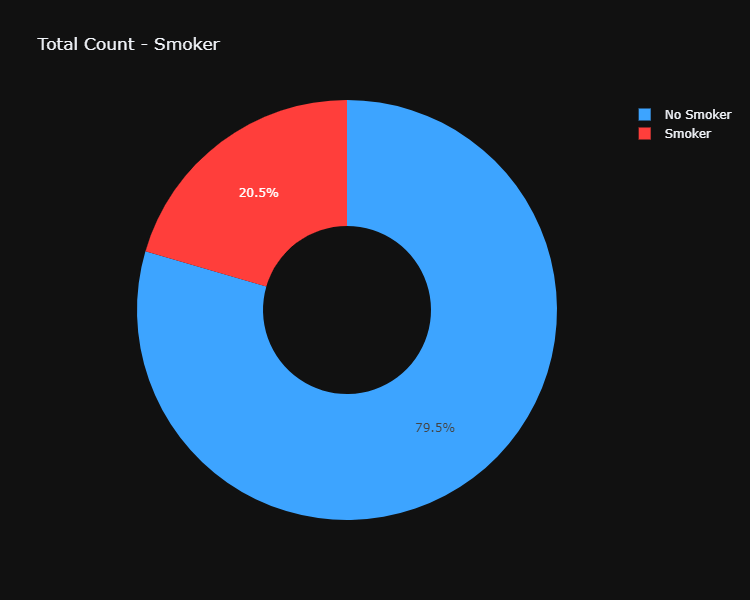

In [21]:
colors= ['#ff3e3b', '#3da4ff']

labels = ['Smoker', 'No Smoker']

values = [len(smoker), 
          len(no_smoker)]

fig_smoker = go.Figure()

fig_smoker.add_trace(go.Pie(labels = labels, 
                         values = values,
                         hole = .4,
                         marker_colors = colors))

fig_smoker.update_layout(
    title_text = 'Total Count - Smoker',
    template = 'plotly_dark'
)

fig_smoker.show('png', width = 750, height = 600)

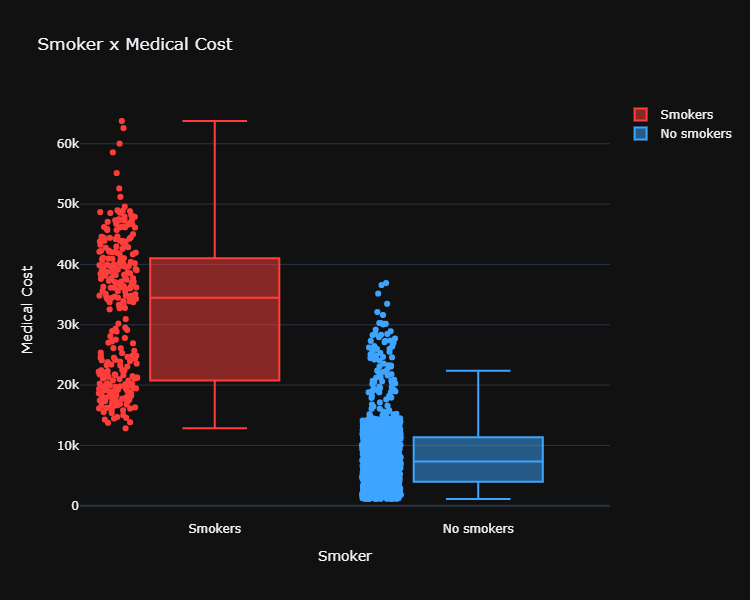

In [22]:
fig_smoker = go.Figure()

fig_smoker.add_trace(go.Box(y = smoker['charges'], 
                            boxpoints = 'all', 
                            marker_color = '#ff3e3b', 
                            name = 'Smokers'))

fig_smoker.add_trace(go.Box(y = no_smoker['charges'], 
                            boxpoints = 'all', 
                            marker_color = '#3da4ff', 
                            name = 'No smokers'))

fig_smoker.update_layout(
    title_text = 'Smoker x Medical Cost',
    xaxis_title_text = 'Smoker',
    yaxis_title_text = 'Medical Cost',
    template = 'plotly_dark'
)

fig_smoker.show('png', width = 750, height = 600)

### Region

In [23]:
southwest = data[data['region'] == 'southwest']

southeast = data[data['region'] == 'southeast']

northwest = data[data['region'] == 'northwest']

northeast = data[data['region'] == 'northeast']

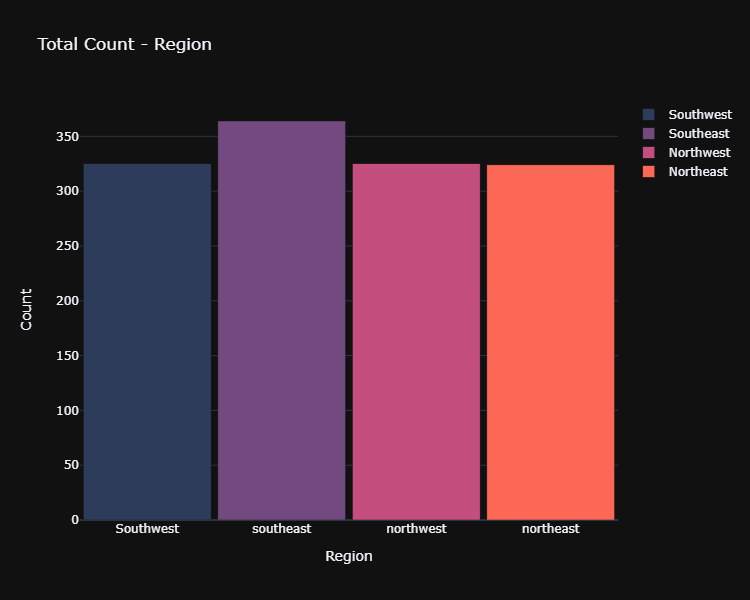

In [24]:
fig_region = go.Figure()

fig_region.add_trace(go.Bar(x = ['Southwest'],
                         y = [len(southwest)],
                         name = 'Southwest',
                         marker_color = '#2e3c5c'))

fig_region.add_trace(go.Bar(x = ['southeast'],
                         y = [len(southeast)],
                         name = 'Southeast',
                         marker_color = '#734a80'))

fig_region.add_trace(go.Bar(x = ['northwest'],
                         y = [len(northwest)],
                         name = 'Northwest',
                         marker_color = '#c44e7d'))

fig_region.add_trace(go.Bar(x = ['northeast'],
                         y = [len(northeast)],
                         name = 'Northeast',
                         marker_color = '#fb6956'))


fig_region.update_layout(
    title_text = 'Total Count - Region ',
    xaxis_title_text = 'Region',
    yaxis_title_text = 'Count',
    bargap = 0.05,
    template = 'plotly_dark'
)

fig_region.show('png', width = 750, height = 600)

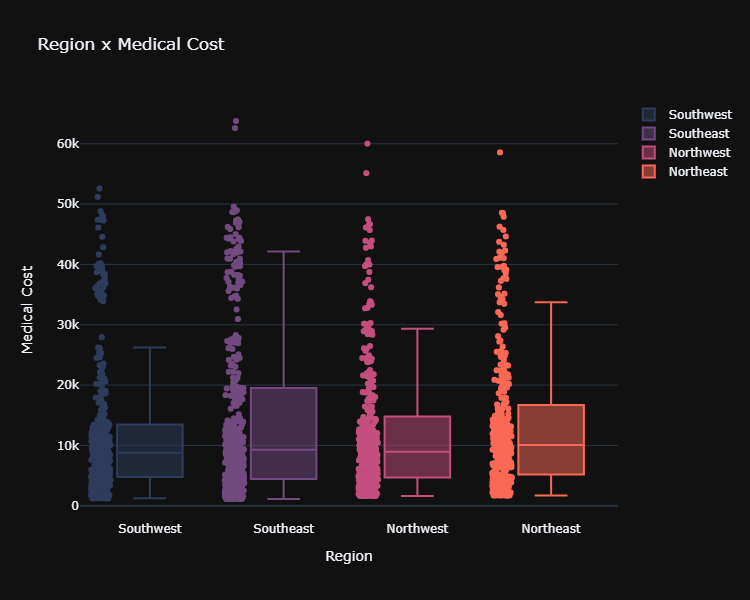

In [25]:
fig_region = go.Figure()

fig_region.add_trace(go.Box(y = southwest['charges'],
                            marker_color = '#2e3c5c',
                            boxpoints = 'all', 
                            name = 'Southwest'))

fig_region.add_trace(go.Box(y = southeast['charges'],
                            marker_color = '#734a80',
                            boxpoints = 'all', 
                            name = 'Southeast'))

fig_region.add_trace(go.Box(y = northwest['charges'],
                            marker_color = '#c44e7d',
                            boxpoints = 'all', 
                            name = 'Northwest'))

fig_region.add_trace(go.Box(y = northeast['charges'],
                            marker_color = '#fb6956',
                            boxpoints = 'all', 
                            name = 'Northeast'))

fig_region.update_layout(
    title_text = 'Region x Medical Cost',
    xaxis_title_text = 'Region',
    yaxis_title_text = 'Medical Cost',
    template = 'plotly_dark'
)

fig_region.show('png', width = 750, height = 600)

### Medical cost

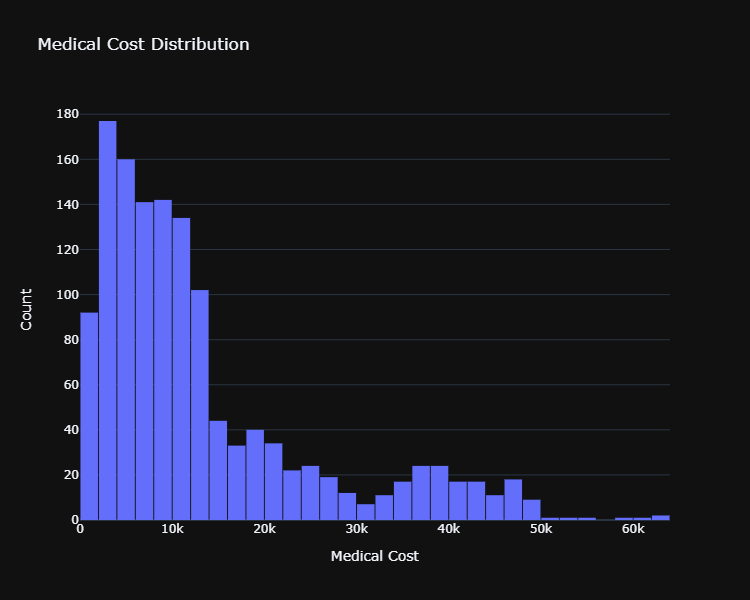

In [26]:
fig_cost = go.Figure()

fig_cost.add_trace(go.Histogram(x = data['charges']))

fig_cost.update_layout(
    title_text = 'Medical Cost Distribution',
    xaxis_title_text = 'Medical Cost',
    yaxis_title_text = 'Count', 
    bargap  = 0.05, 
    template = 'plotly_dark'
)

fig_cost.show('png', width = 750, height = 600)

### Checking for missing values

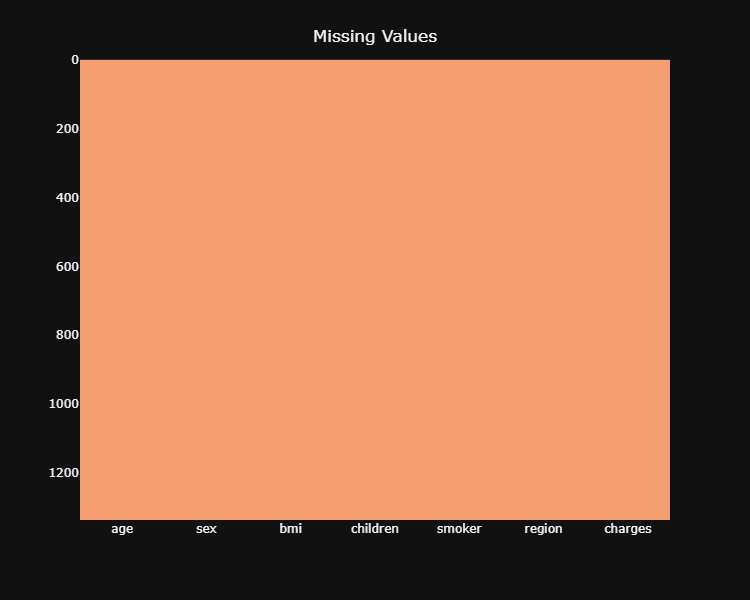

In [27]:
fig_null_values = px.imshow(data.isnull(), color_continuous_scale = 'peach')

fig_null_values.update_layout(
    title = {
        'text': "Missing Values",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    template = 'plotly_dark',
    coloraxis_showscale = False
)

fig_null_values.show('png', width = 750, height = 600)

### Enconding data

In [28]:
data = pd.get_dummies(data, columns = ['sex', 'smoker', 'region'])

data.drop(['sex_male', 'smoker_yes', 'region_southwest'], axis = 1, inplace = True)

data.head()

,age,bmi,children,charges,sex_female,smoker_no,region_northeast,region_northwest,region_southeast
0,19,27.900,0,16884.92400,1,0,0,0,0
1,18,33.770,1,1725.55230,0,1,0,0,1
2,28,33.000,3,4449.46200,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0


### Checking features correlation

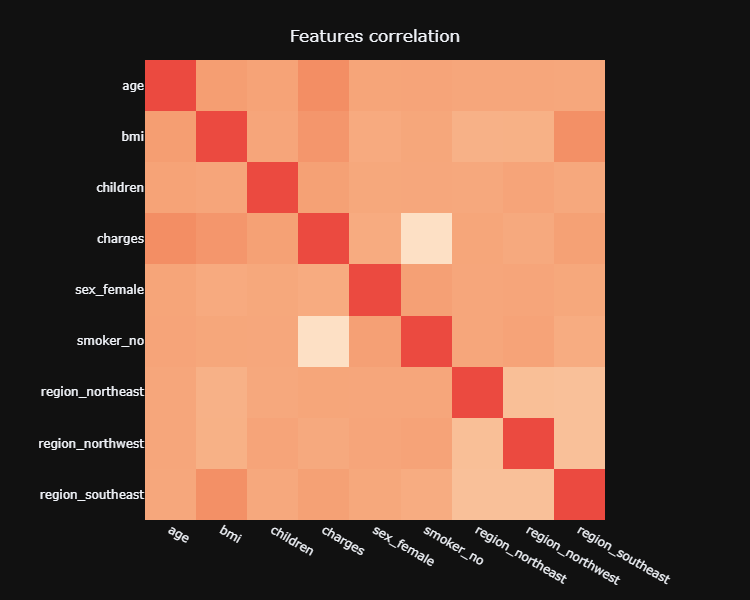

In [29]:
fig_corr = px.imshow(data.corr(), color_continuous_scale = 'peach')

fig_corr.update_layout(
    title = {
        'text': "Features correlation",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    template = 'plotly_dark',
    coloraxis_showscale = False 
)

fig_corr.show('png',  width = 750, height = 600)

### Defining variables

In [30]:
X = data[['smoker_no', 'bmi', 'age']]

y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Machine learning models

### Linear regression

In [31]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred_linear = linear_regression.predict(X_test)

rsq_linear = r2_score(y_test, y_pred_linear)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

cv_linear = cross_val_score(LinearRegression(), X, y, cv = 10).mean()

### Polynomial regression 

In [32]:
polynomial_features = PolynomialFeatures(degree = 3)

polynomial_features.fit(X_train)

X_train_poly = polynomial_features.transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

X_poly = polynomial_features.fit_transform(X)

polynomial_regression = LinearRegression().fit(X_train_poly, y_train)

y_pred_poly = polynomial_regression.predict(X_test_poly)

rsq_poly = r2_score(y_test, y_pred_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

cv_poly = cross_val_score(LinearRegression(), X_poly, y, cv = 10).mean()

### Random forest regression model

In [33]:
rfr_parameters = {'n_estimators' : [10, 20, 50, 100],
                  'max_depth' : [3, 5, 7, 9, 10]
                 }

grid_search_rfr = GridSearchCV(estimator = RandomForestRegressor(), 
                           param_grid = rfr_parameters,
                           cv = 10,
                           n_jobs = -1)

grid_search_rfr.fit(X_train, y_train)

rfr = grid_search_rfr.best_estimator_

y_pred_rfr = rfr.predict(X_test)

rsq_rfr = r2_score(y_test, y_pred_rfr)

rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))

cv_rfr = cross_val_score(rfr, X, y, cv = 10).mean()

# Comparing models

In [34]:
models = [('Linear Regression', rsq_linear, rmse_linear, cv_linear), 
          ('Polynomial Regression', rsq_poly, rmse_poly, cv_poly),
          ('Random Forest Regression', rsq_rfr, rmse_rfr, cv_rfr)]

model_comparasion = pd.DataFrame(models, columns = ['Model', 'R²', 'RMSE', 'CV Score'])

model_comparasion.head()

,Model,R²,RMSE,CV Score
0,Linear Regression,0.742330,6532.119994,0.743229
1,Polynomial Regression,0.827957,5337.531521,0.836587
2,Random Forest Regression,0.835929,5212.406527,0.851440


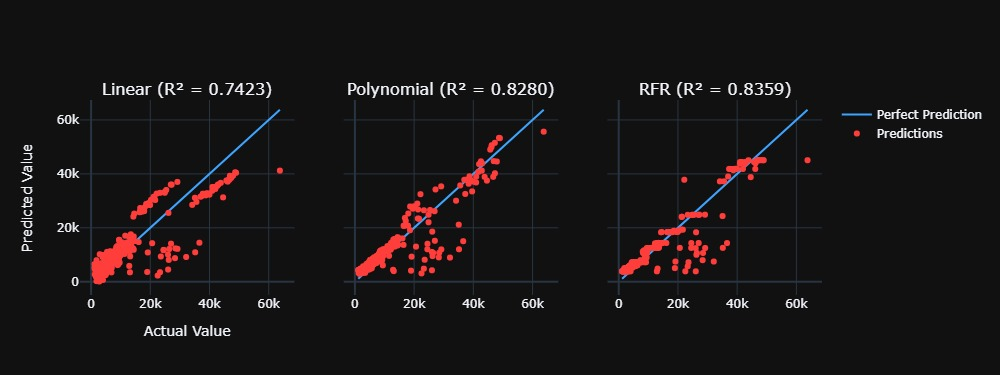

In [35]:
fig_prediction = make_subplots(rows = 1, cols = 3,
                               shared_yaxes = True,
                               subplot_titles = (("Linear (R² = %.4f)" %rsq_linear), 
                                                 ("Polynomial (R² = %.4f)" %rsq_poly),  
                                                 ("RFR (R² = %.4f)" %rsq_rfr)))

# Linear Regression

fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = y_test, 
                                    marker_color = '#3da4ff', 
                                    name = 'Perfect Prediction'),
                         row = 1, col = 1)

fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = y_pred_linear, 
                                    marker_color = '#ff3e3b', 
                                    mode = 'markers', 
                                    name = 'Predictions'),
                         row = 1, col =1)

# Polynomial Regression

fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = y_test, 
                                    marker_color = '#3da4ff', 
                                    name = 'Perfect Prediction', 
                                    showlegend = False),
                         row = 1, col = 2)

fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = y_pred_poly, 
                                    marker_color = '#ff3e3b', 
                                    mode = 'markers', 
                                    name = 'Predictions', 
                                    showlegend = False),
                         row = 1, col = 2)

# Random Forest Regression

fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = y_test, 
                                    marker_color = '#3da4ff', 
                                    name = 'Perfect Prediction',
                                    showlegend = False),
                         row = 1, col =3)

fig_prediction.add_trace(go.Scatter(x = y_test, 
                                    y = y_pred_rfr, 
                                    marker_color = '#ff3e3b', 
                                    mode = 'markers', 
                                    name = 'Predictions', 
                                    showlegend = False),
                         row = 1, col = 3)


fig_prediction.update_layout(
    xaxis_title_text = 'Actual Value',
    yaxis_title_text = 'Predicted Value',
    template = 'plotly_dark'
)

fig_prediction.show('jpg', width = 1000, height = 375)